## EDA theory DA

# m1


In [54]:
data = pd.read_csv('./BEPS.csv')


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
print("Shape of dataset:", data.shape)


Shape of dataset: (1525, 11)


In [57]:
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   rownames                 1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Kennedy                  1525 non-null   int64 
 8   Europe                   1525 non-null   int64 
 9   political.knowledge      1525 non-null   int64 
 10  gender                   1525 non-null   object
dtypes: int64(9), object(2)
memory usage: 131.2+ KB
None
          rownames          age  economic.cond.national  \
count  1525.000000  1525.000000             1525.000000   
mean    763.000000    54.1822

In [58]:
data.head()

,rownames,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender
0,1,Liberal Democrat,43,3,3,4,1,4,2,2,female
1,2,Labour,36,4,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,3,2,male
3,4,Labour,24,4,2,2,1,3,4,0,female
4,5,Labour,41,2,2,1,1,4,6,2,male


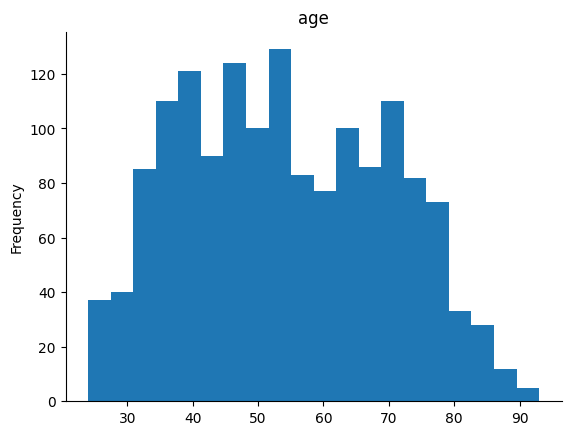

In [59]:
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# M2
data transformation

In [60]:
data = data.drop_duplicates()
data.fillna(method='ffill', inplace=True)


<ipython-input-60-c11381224c14>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [61]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')
# Check for missing values and handle them
data['age'].fillna(data['age'].mean(), inplace=True)
# Bin the 'age' column into 3 categories
data['age_binned'] = pd.cut(data['age'], bins=3, labels=['Young', 'Middle-aged', 'Old'])
print(data[['age', 'age_binned']].head())

   age age_binned
0   43      Young
1   36      Young
2   35      Young
3   24      Young
4   41      Young


<ipython-input-61-f6de7283222f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [62]:
data['economic.cond.national'] = pd.to_numeric(data['economic.cond.national'], errors='coerce')
data['econ_cond_binned'] = pd.cut(data['economic.cond.national'], bins=3, labels=['Poor', 'Average', 'Good'])
print(data[['economic.cond.national', 'econ_cond_binned']].head())


   economic.cond.national econ_cond_binned
0                       3          Average
1                       4             Good
2                       4             Good
3                       4             Good
4                       2             Poor


In [63]:
data.columns

Index(['rownames', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Kennedy', 'Europe',
       'political.knowledge', 'gender', 'age_binned', 'econ_cond_binned'],
      dtype='object')

In [64]:
data.head()

,rownames,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender,age_binned,econ_cond_binned
0,1,Liberal Democrat,43,3,3,4,1,4,2,2,female,Young,Average
1,2,Labour,36,4,4,4,4,4,5,2,male,Young,Good
2,3,Labour,35,4,4,5,2,3,3,2,male,Young,Good
3,4,Labour,24,4,2,2,1,3,4,0,female,Young,Good
4,5,Labour,41,2,2,1,1,4,6,2,male,Young,Poor


# module 3
variable analysis

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   rownames                 1525 non-null   int64   
 1   vote                     1525 non-null   object  
 2   age                      1525 non-null   int64   
 3   economic.cond.national   1525 non-null   int64   
 4   economic.cond.household  1525 non-null   int64   
 5   Blair                    1525 non-null   int64   
 6   Hague                    1525 non-null   int64   
 7   Kennedy                  1525 non-null   int64   
 8   Europe                   1525 non-null   int64   
 9   political.knowledge      1525 non-null   int64   
 10  gender                   1525 non-null   object  
 11  age_binned               1525 non-null   category
 12  econ_cond_binned         1525 non-null   category
dtypes: category(2), int64(9), object(2)
memory usage: 134.4+ KB


In [66]:
print(data['vote'].value_counts())
print(data['gender'].value_counts())


vote
Labour              720
Conservative        462
Liberal Democrat    343
Name: count, dtype: int64
gender
female    812
male      713
Name: count, dtype: int64


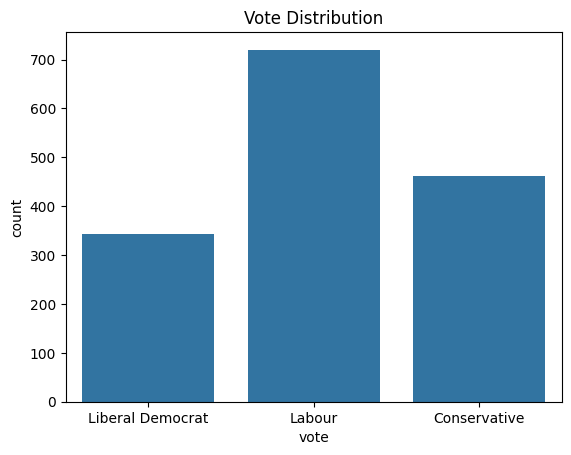

In [67]:
sns.countplot(x='vote', data=data)
plt.title('Vote Distribution')
plt.show()

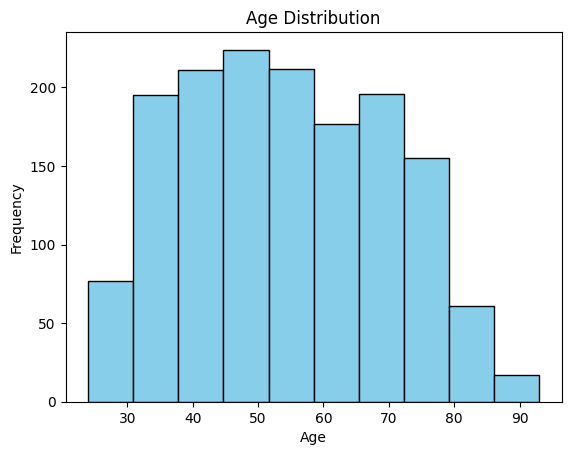

In [68]:
plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


vote
Conservative        56.870130
Labour              53.004167
Liberal Democrat    53.034985
Name: age, dtype: float64


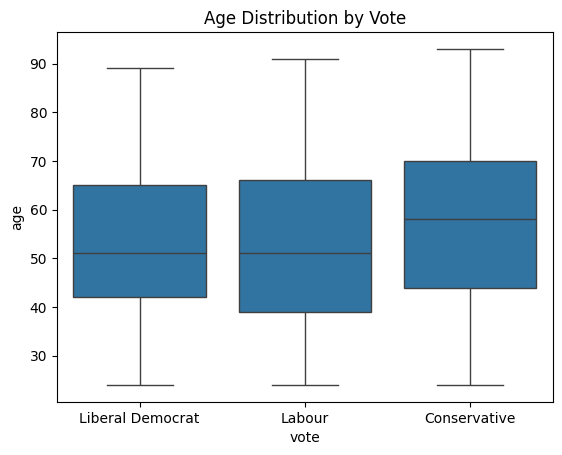

In [69]:
# Boxplot
print(data.groupby('vote')['age'].mean())
sns.boxplot(x='vote', y='age', data=data)
plt.title('Age Distribution by Vote')
plt.show()



                         rownames       age  economic.cond.national  \
rownames                 1.000000  0.005128                0.071882   
age                      0.005128  1.000000                0.018567   
economic.cond.national   0.071882  0.018567                1.000000   
economic.cond.household  0.035907 -0.041587                0.346303   
Blair                    0.001602  0.030218                0.326878   
Hague                    0.000282  0.034626               -0.199766   
Kennedy                  0.027406  0.003568                0.097299   
Europe                   0.038218  0.068880               -0.209429   
political.knowledge      0.002485 -0.048490               -0.023624   

                         economic.cond.household     Blair     Hague  \
rownames                                0.035907  0.001602  0.000282   
age                                    -0.041587  0.030218  0.034626   
economic.cond.national                  0.346303  0.326878 -0.199766   
e

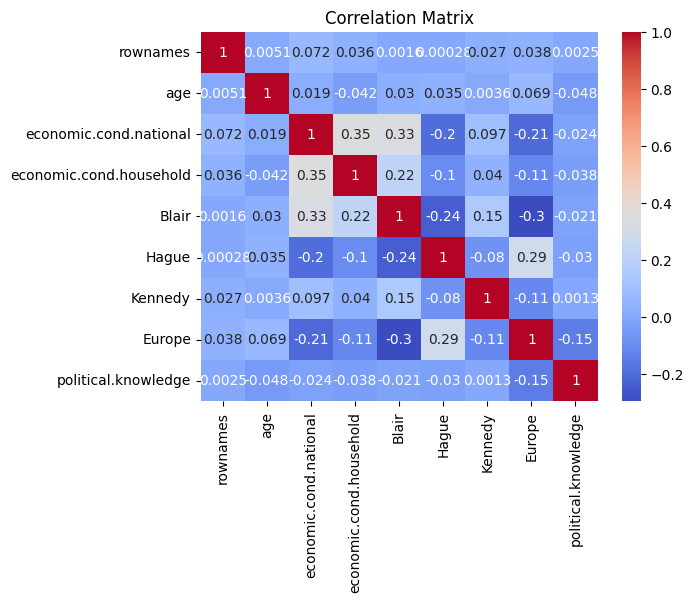

In [70]:
# data_corr = data.select_dtypes(include=[np.number])
correlation = data_corr.corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


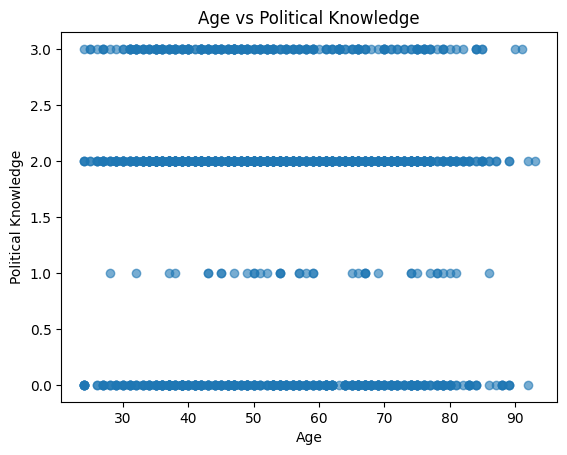

In [71]:
plt.scatter(data['age'], data['political.knowledge'], alpha=0.6)
plt.title('Age vs Political Knowledge')
plt.xlabel('Age')
plt.ylabel('Political Knowledge')
plt.show()

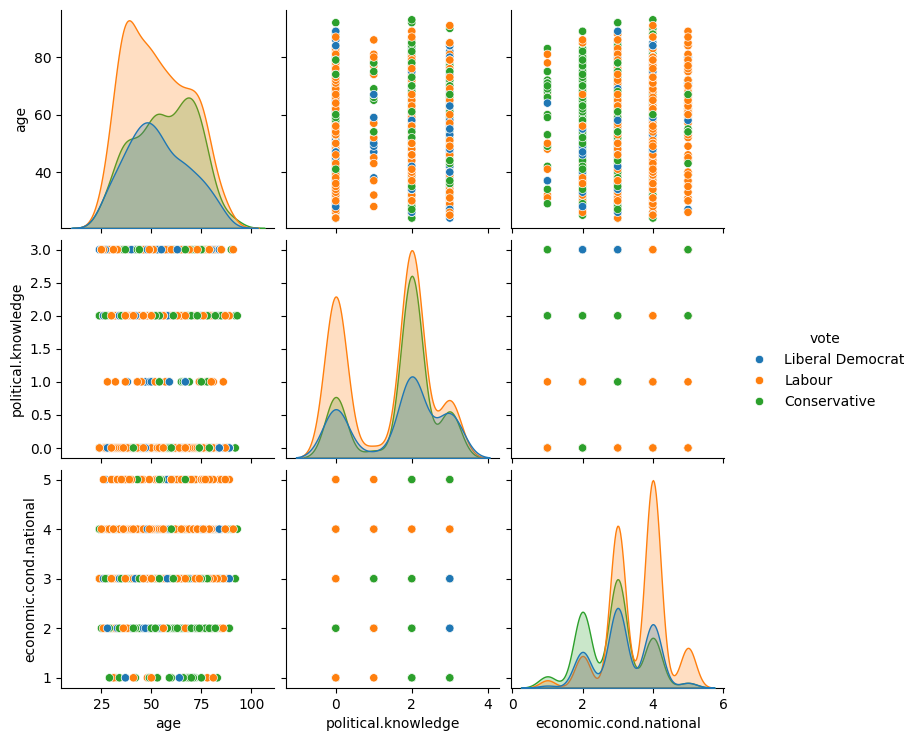

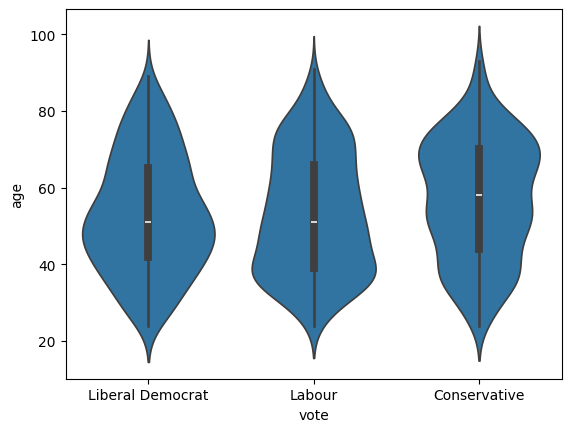

In [72]:
# Pairplot
sns.pairplot(data[['age', 'political.knowledge', 'economic.cond.national', 'vote']], hue='vote')
plt.show()



# Violin plot
sns.violinplot(x='vote', y='age', data=data)
plt.show()

# Module 4
Data Summarization and Visualization

In [76]:
#1D
print("Mean Age:", data['age'].mean())
print("Median Age:", data['age'].median())
print("Standard Deviation of Age:", data['age'].std())
print("Mode of Vote:", data['vote'].mode()[0])


Mean Age: 54.18229508196721
Median Age: 53.0
Standard Deviation of Age: 15.711208571641977
Mode of Vote: Labour


                         age  political.knowledge
age                  1.00000             -0.04849
political.knowledge -0.04849              1.00000


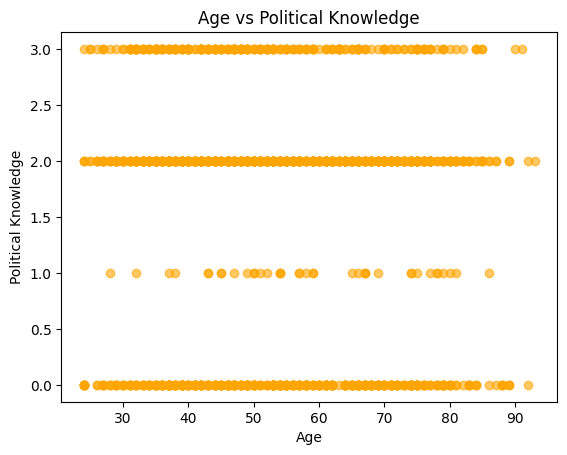

In [77]:
correlation = data[['age', 'political.knowledge']].corr()
print(correlation)
plt.scatter(data['age'], data['political.knowledge'], alpha=0.6, color='orange')
plt.title('Age vs Political Knowledge')
plt.xlabel('Age')
plt.ylabel('Political Knowledge')
plt.show()

gender            female  male
vote                          
Conservative         259   203
Labour               372   348
Liberal Democrat     181   162


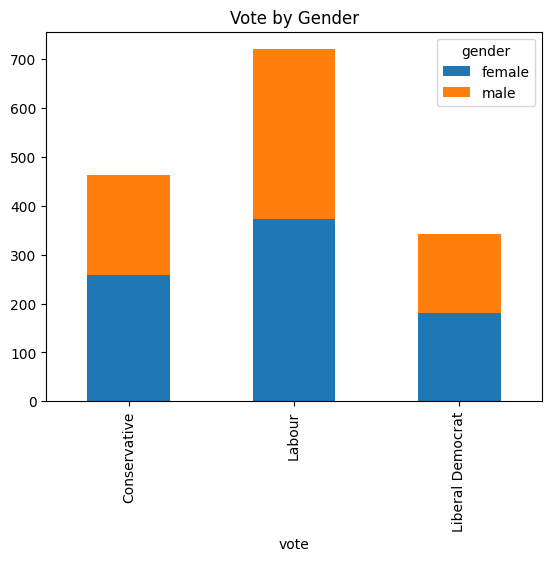

In [78]:
contingency_table = pd.crosstab(data['vote'], data['gender'])
print(contingency_table)
contingency_table.plot(kind='bar', stacked=True)
plt.title('Vote by Gender')
plt.show()


In [82]:
data_mapped =data
data_mapped['gender'].map({'male': 0, 'female': 1})

,gender
0,1
1,0
2,0
3,1
4,0
...,...
1520,0
1521,0
1522,0
1523,0


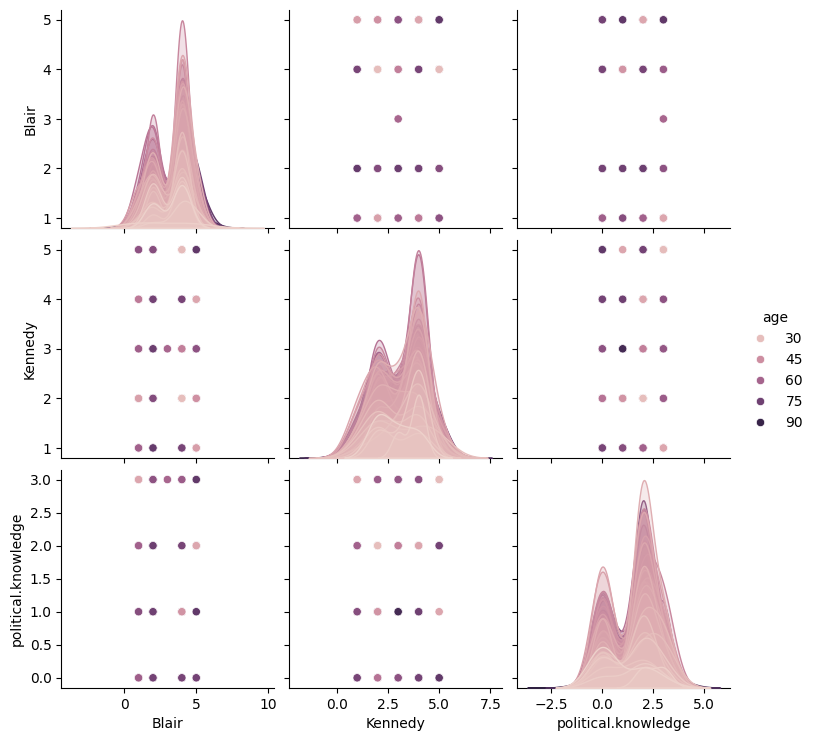

In [85]:
sns.pairplot(data[['age', 'Blair', 'Kennedy', 'political.knowledge']], hue='age')
plt.show()

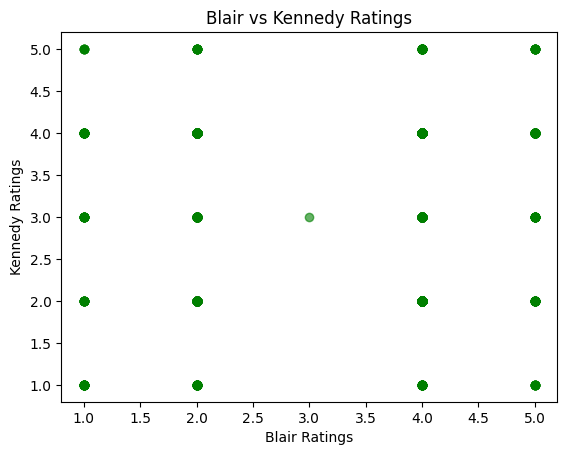

<ipython-input-88-9067036742f5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vote', data=data, palette='viridis')


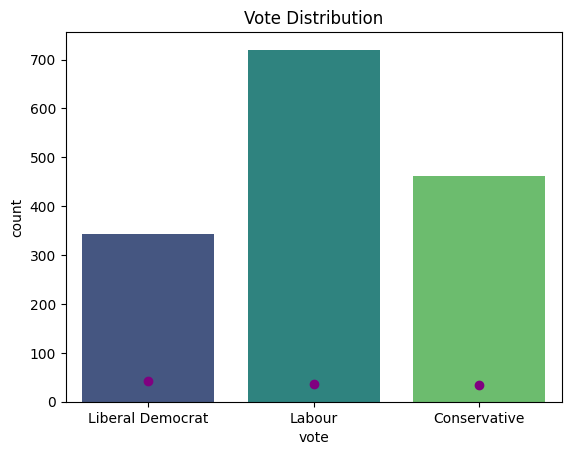

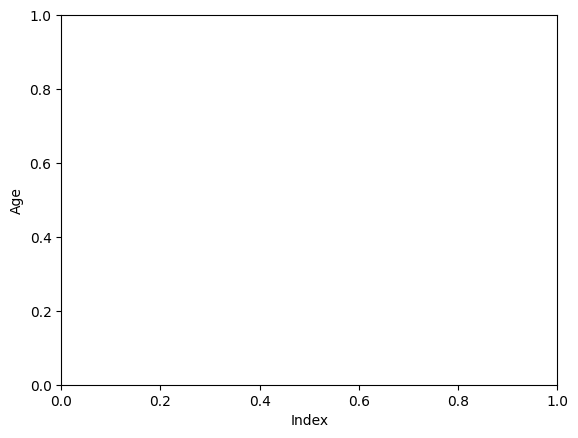

In [88]:
plt.scatter(data['Blair'], data['Kennedy'], alpha=0.6, color='green')
plt.title('Blair vs Kennedy Ratings')
plt.xlabel('Blair Ratings')
plt.ylabel('Kennedy Ratings')
plt.show()
plt.plot(data.index, data['age'], 'o', color='purple')
plt.title('Dot Chart for Age')
sns.countplot(x='vote', data=data, palette='viridis')
plt.title('Vote Distribution')
plt.show()



# Module 5
Clustering Algorithms

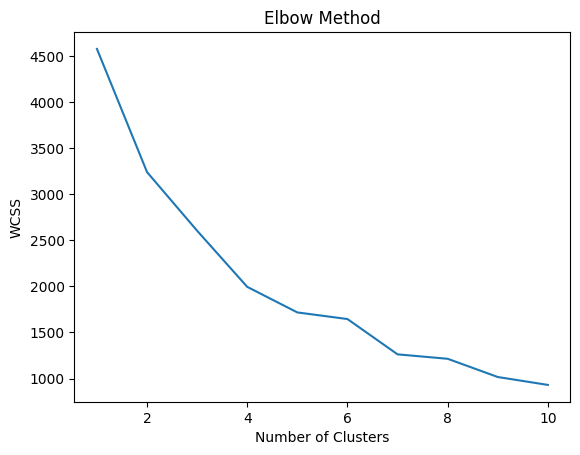

               age  political.knowledge  economic.cond.national
cluster                                                        
0        69.067751             2.162602                3.639566
1        54.427313             0.037445                3.359031
2        54.683983             2.064935                1.839827
3        42.038217             2.250531                3.518047


In [127]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# relevant features for clustering
features = ['age', 'political.knowledge', 'economic.cond.national']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to your DataFrame
data['cluster'] = kmeans.labels_

# Analyze the clusters (e.g., group by cluster and examine feature means)
print(data.groupby('cluster')[features].mean())

# Module 6


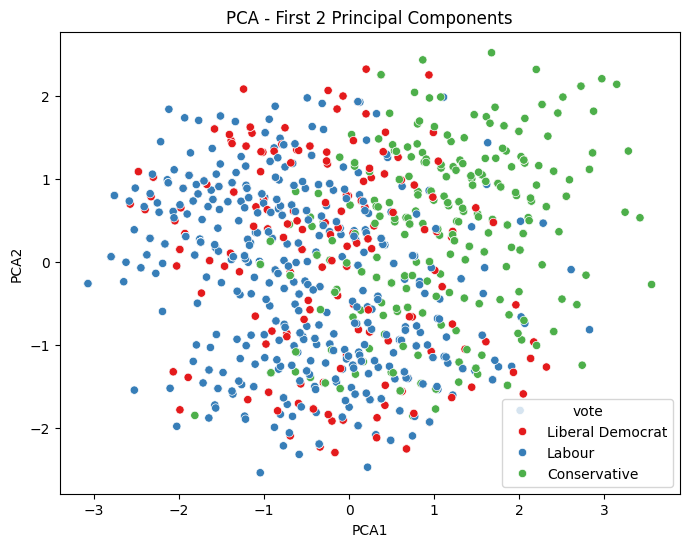

Explained variance ratio for the first 2 components: [0.32555632 0.20869562]


In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for PCA
numerical_columns = ['Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
data_numerical = data[numerical_columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['vote'], palette='Set1')
plt.title('PCA - First 2 Principal Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print("Explained variance ratio for the first 2 components:", pca.explained_variance_ratio_)



In [110]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8bfb5c932c6d4d843de95e82bdd7749b5eb6f921668e9e4f474d66aab3232f39
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


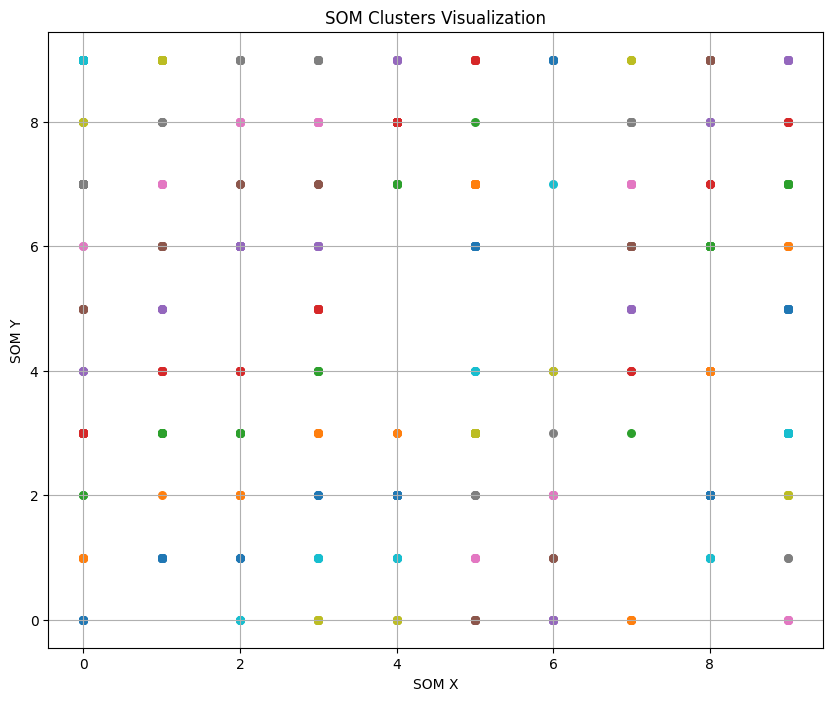

In [114]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
data_numerical = data[numerical_columns]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)


som_size = 10
som = MiniSom(x=som_size, y=som_size, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(data_scaled)
som.train_random(data_scaled, 100)

win_map = som.win_map(data_scaled)


for x in range(som_size):
    for y in range(som_size):

        points = win_map.get((x, y), [])
        if points:
            plt.scatter([x] * len(points), [y] * len(points), label=f'Cluster ({x}, {y})', s=30)

plt.title('SOM Clusters Visualization')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.grid(True)
plt.show()


# Module 7


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

numerical_columns = ['Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
data_numerical = data[numerical_columns]
target = data['vote'].apply(lambda x: 1 if x == 'Labour' else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_numerical)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.19818248425157556
R-squared: 0.20190798279208566


In [126]:
import random
# Reingofrcement learning

grid = np.array([
    [0, 0, 0, -1, 0],
    [0, -1, 0, -1, 0],
    [0, 0, 0, -1, 0],
    [0, 0, -1, -1, 0],
    [0, 0, 0, 0, 1]
])


q_table = np.zeros((5, 5, 4))
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.2
episodes = 1000

def valid_move(x, y):
    return 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1] and grid[x, y] != -1
for episode in range(episodes):
    x, y = 0, 0
    while (x, y) != (4, 4):  # Goal is at (4, 4)
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(4))
        else:
            action = np.argmax(q_table[x, y])
        dx, dy = actions[action]
        new_x, new_y = x + dx, y + dy
        if valid_move(new_x, new_y):
            reward = 1 if (new_x, new_y) == (4, 4) else 0
            q_table[x, y, action] = q_table[x, y, action] + learning_rate * (reward + discount_factor * np.max(q_table[new_x, new_y]) - q_table[x, y, action])
            x, y = new_x, new_y

print("Q-table after training:")
print(q_table)

x, y = 0, 0
path = [(x, y)]
while (x, y) != (4, 4):
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    x, y = x + dx, y + dy
    path.append((x, y))

print("Path to goal:", path)


Q-table after training:
[[[0.         0.4782969  0.         0.38742049]
  [0.         0.         0.30422992 0.43046721]
  [0.         0.4782969  0.35650112 0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.3861379  0.531441   0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.40005105 0.531441   0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.46628164 0.46204922 0.         0.59049   ]
  [0.         0.6561     0.53015647 0.53000294]
  [0.46398261 0.         0.59049    0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.53144085 0.2388758  0.         0.3422894 ]
  [0.58990612 0.729      0.47768588 0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.476